# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

–ò–º–ø–æ—Ä—Ç –∏ —É—Å—Ç–∞–Ω–æ–≤–∫–∞ –±–∏–±–ª–∏–æ—Ç–µ–∫

In [37]:
!pip install pmdarima
# !pip install numpy==1.26.4
!pip install keras-tuner

from pmdarima import auto_arima
import pickle
import warnings
import requests
import statsmodels
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from io import BytesIO
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.stattools import acf, adfuller
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.layers import LSTM, Dense, Dropout
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA



warnings.filterwarnings("ignore")
%matplotlib inline

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


–í—ã–±–µ—Ä–∏—Ç–µ —Å–ø–æ—Å–æ–± –∑–∞–≥—Ä—É–∑–∫–∏ –¥–∞–Ω–Ω—ã—Ö

In [2]:
url = "https://github.com/samoletpanfilov/reinforcement_task/raw/refs/heads/master/data/train.xlsx"  # –°—Å—ã–ª–∫–∞ –¥–æ–ª–∂–Ω–∞ —Å–æ–¥–µ—Ä–∂–∞—Ç—å raw
response = requests.get(url)
df_ts = pd.read_excel(BytesIO(response.content), engine='openpyxl')

In [3]:
# df_ts = pd.read_excel('/content/drive/MyDrive/int/train.xlsx')

# –ê–Ω–∞–ª–∏–∑ –∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞

### –ø—Ä–æ—Å–º–æ—Ç—Ä —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏

In [4]:
df_ts.head(15)

dt  –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É
0  2015-01-05             32900
1  2015-01-12             32500
2  2015-01-19             32000
3  2015-01-26             30700
4  2015-02-02             30300
5  2015-02-09             30300
6  2015-02-16             30100
7  2015-02-23             29400
8  2015-03-02             29200
9  2015-03-09             29000
10 2015-03-16             28700
11 2015-03-23             27800
12 2015-03-30             27200
13 2015-04-06             26600
14 2015-04-13             25700

In [5]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                400 non-null    datetime64[ns]
 1   –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É  400 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.4 KB


In [6]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –Ω–∞–ª–∏—á–∏–µ NaN
df_ts['dt'].isna().sum()

0

In [7]:
df_ts.describe()

dt  –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É
count                  400        400.000000
mean   2018-11-01 12:00:00      39229.475000
min    2015-01-05 00:00:00      21000.000000
25%    2016-12-03 06:00:00      31075.000000
50%    2018-11-01 12:00:00      35450.000000
75%    2020-09-29 18:00:00      42000.000000
max    2022-08-29 00:00:00      79000.000000
std                    NaN      13407.979668

In [8]:
df_ts.shape

(400, 2)

### –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è

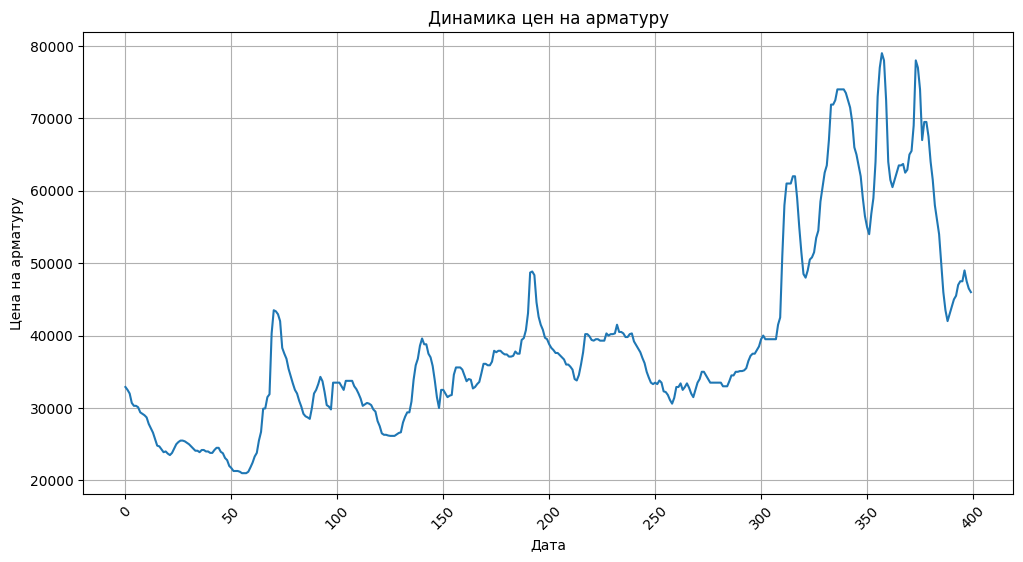

In [9]:
# –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫
plt.figure(figsize=(12, 6))
plt.plot(df_ts["–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É"], marker='', linestyle='-')

# –ù–∞—Å—Ç—Ä–æ–∏–º –æ—Å–∏ –∏ –∑–∞–≥–æ–ª–æ–≤–æ–∫
plt.xlabel("–î–∞—Ç–∞")
plt.ylabel("–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É")
plt.title("–î–∏–Ω–∞–º–∏–∫–∞ —Ü–µ–Ω –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É")
plt.grid(True)

# –£–ª—É—á—à–∏–º —á–∏—Ç–∞–µ–º–æ—Å—Ç—å –º–µ—Ç–æ–∫ –¥–∞—Ç
plt.xticks(rotation=45)

# –ü–æ–∫–∞–∑—ã–≤–∞–µ–º –≥—Ä–∞—Ñ–∏–∫
plt.show()

**–í–æ–ø—Ä–æ—Å—ã –∫ –≥—Ä–∞—Ñ–∏–∫—É:**

 1.–ï—Å—Ç—å –ª–∏ —Ç—Ä–µ–Ω–¥?

 2.–ï—Å—Ç—å –ª–∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å?

 3.–ù–∞—Å–∫–æ–ª—å–∫–æ —Å–∏–ª—å–Ω—ã–π —à—É–º?



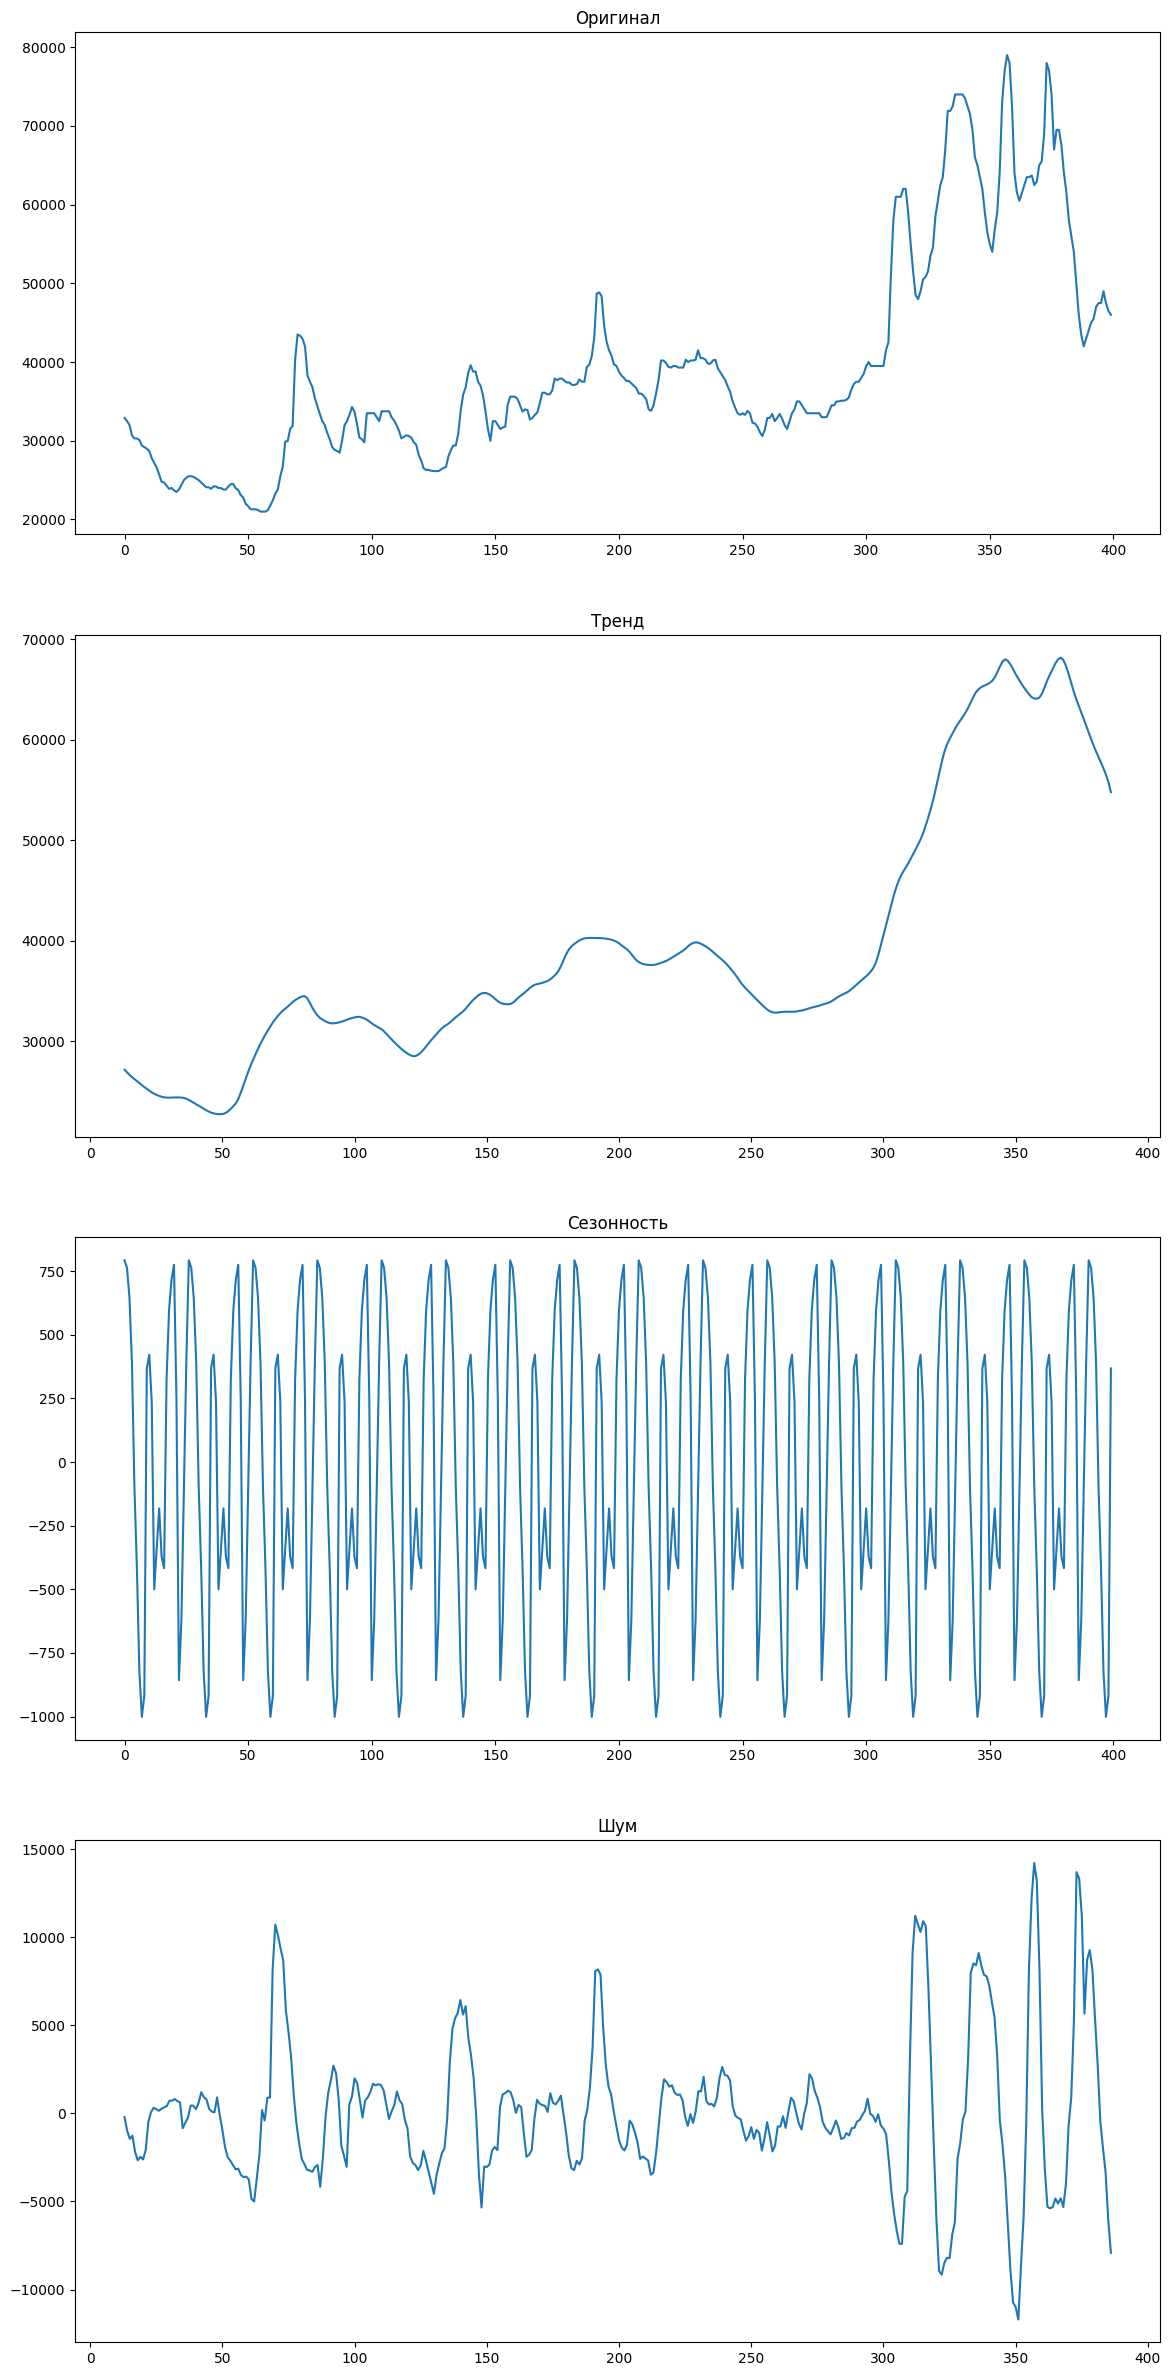

In [10]:
# –†–∞–∑–ª–æ–∂–∏–º —Ä—è–¥ –Ω–∞ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã –∏ –ø—Ä–æ–≤–µ—Ä–∏–º –æ—Ç–≤–µ—Ç—ã –Ω–∞ –≤–æ–ø—Ä–æ—Å—ã

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 30))
decompose = seasonal_decompose(df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É'],period = 26)

ax[0].set_title('–û—Ä–∏–≥–∏–Ω–∞–ª')
ax[1].set_title('–¢—Ä–µ–Ω–¥')
ax[2].set_title('–°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å')
ax[3].set_title('–®—É–º')

decompose.observed.plot(ax=ax[0])
decompose.trend.plot(ax=ax[1])
decompose.seasonal.plot(ax=ax[2])
decompose.resid.plot(ax=ax[3]);

–î–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏—è –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞


üîπ –û—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–π —Ä—è–¥  


–ò—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ, —Å–æ–¥–µ—Ä–∂–∞—â–∏–µ —Ç—Ä–µ–Ω–¥, —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å –∏ —à—É–º.


 üìà –¢—Ä–µ–Ω–¥

   
–û–±—â–∏–π –≤–æ—Å—Ö–æ–¥—è—â–∏–π —Ç—Ä–µ–Ω–¥, –æ—Ç—Ä–∞–∂–∞—é—â–∏–π –¥–æ–ª–≥–æ—Å—Ä–æ—á–Ω—ã–π —Ä–æ—Å—Ç.


üîÑ –°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å


–í—ã—Ä–∞–∂–µ–Ω–Ω—ã–µ –ø–µ—Ä–∏–æ–¥–∏—á–µ—Å–∫–∏–µ –∫–æ–ª–µ–±–∞–Ω–∏—è, —Å–æ—Ö—Ä–∞–Ω—è—é—â–∏–µ—Å—è –Ω–∞ –ø—Ä–æ—Ç—è–∂–µ–Ω–∏–∏ –≤—Å–µ–≥–æ —Ä—è–¥–∞.


 üîÄ –®—É–º  

–£–º–µ—Ä–µ–Ω–Ω—ã–π, –Ω–æ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è –±–ª–∏–∂–µ –∫ –∫–æ–Ω—Ü—É —Ä—è–¥–∞, —á—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ –∞–Ω–æ–º–∞–ª–∏–∏ –∏–ª–∏ –≤–æ–∑—Ä–∞—Å—Ç–∞–Ω–∏–µ –≤–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç–∏.


### –†–∞–±–æ—Ç–∞ —Å –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π

In [11]:
# –ü–æ–ª—É—á–∏–ª '—Å—ã—Ä—ã–µ' –∑–Ω–∞—á–µ–Ω–∏—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π
acf(df_ts["–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É"] ,nlags = 100, fft = False)

array([1.        , 0.99138242, 0.97367714, 0.95122039, 0.92740427,
       0.90357365, 0.88126621, 0.8606089 , 0.84235253, 0.82671727,
       0.81349611, 0.8020525 , 0.7925797 , 0.78508849, 0.78019657,
       0.77692922, 0.77376814, 0.76901294, 0.76227632, 0.75319077,
       0.74261145, 0.7309889 , 0.71862345, 0.7046383 , 0.68939965,
       0.67325908, 0.65612584, 0.63820561, 0.62109396, 0.60459259,
       0.58872289, 0.57435372, 0.56120831, 0.54900152, 0.5377084 ,
       0.5271632 , 0.51674918, 0.5068141 , 0.49691253, 0.48636205,
       0.47460061, 0.4600824 , 0.44257206, 0.42285538, 0.40223733,
       0.38033844, 0.35769402, 0.33517203, 0.31316745, 0.29306128,
       0.27522925, 0.2595102 , 0.24447201, 0.23086215, 0.21896621,
       0.20859445, 0.1993889 , 0.19088593, 0.18300826, 0.1757314 ,
       0.16880023, 0.16166525, 0.15350675, 0.14370082, 0.13267574,
       0.12198755, 0.11231837, 0.10288107, 0.0929827 , 0.08286002,
       0.07336018, 0.06476539, 0.05709237, 0.05068118, 0.04473

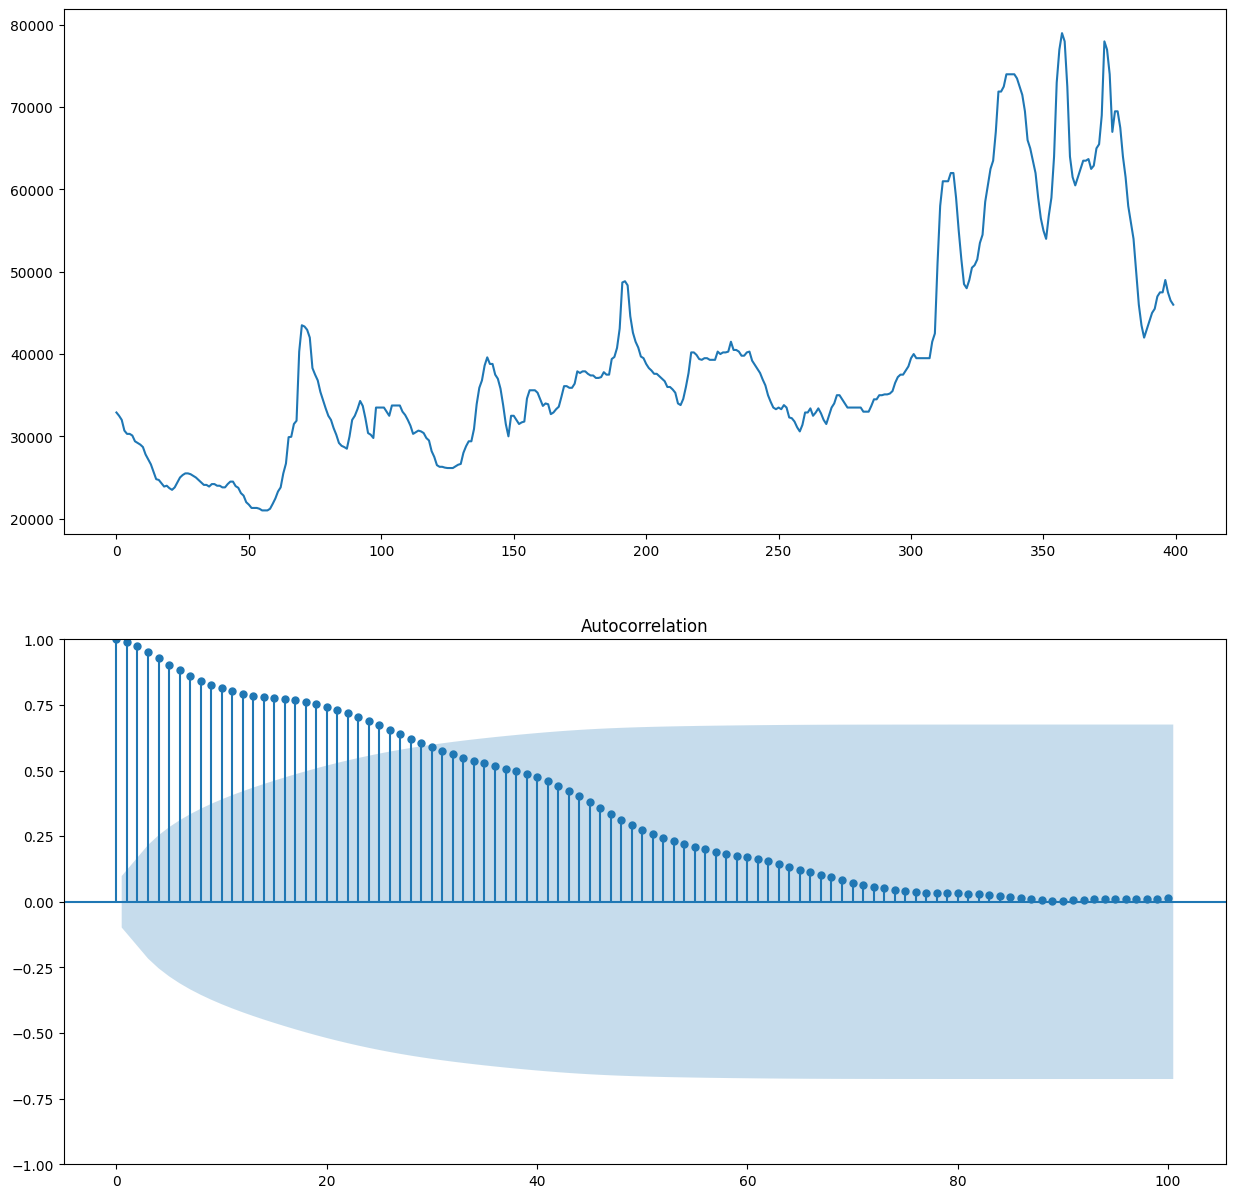

In [12]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É'].plot(ax=ax[0])
plot_acf(df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É'], lags=100, ax=ax[1]);

–í—ã—Å–æ–∫–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –Ω–∞ –º–∞–ª—ã—Ö –ª–∞–≥–∞—Ö —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Å–∏–ª—å–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ç–µ–∫—É—â–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –æ—Ç –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö.

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–æ—Å—Ç–µ–ø–µ–Ω–Ω–æ —É–º–µ–Ω—å—à–∞–µ—Ç—Å—è —Å —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º –ª–∞–≥–∞, —á—Ç–æ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω–æ –¥–ª—è –º–Ω–æ–≥–∏—Ö –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤.


–°–≤–µ—Ç–ª–æ-—Å–∏–Ω—è—è –æ–±–ª–∞—Å—Ç—å ‚Äì —ç—Ç–æ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª: –∑–Ω–∞—á–µ–Ω–∏—è –≤–Ω—É—Ç—Ä–∏ –Ω–µ–≥–æ –º–æ–∂–Ω–æ —Å—á–∏—Ç–∞—Ç—å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –Ω–µ–∑–Ω–∞—á–∏–º—ã–º–∏.

In [13]:
# –ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å –ø–µ—Ä–≤–æ–Ω–∞—á–∞–ª—å–Ω–æ–≥–æ —Ä—è–¥–∞
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è —Ç–µ—Å—Ç–∞ ADF
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")

    if result[1] < 0.05:
        print("–†—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value < 0.05)")
    else:
        print("–†—è–¥ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value >= 0.05)")
# –ü—Ä–æ–≤–µ—Ä–∏–º –Ω–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å –∏—Å—Ö–æ–¥–Ω—ã–π —Ä—è–¥
adf_test(df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É'])

ADF Statistic: -1.9258699893713456
p-value: 0.31999061025699155
Critical Values: {'1%': -3.4470566389664703, '5%': -2.8689037160476016, '10%': -2.570692663557422}
–†—è–¥ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value >= 0.05)


Text(0.5, 1.0, '–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–Ω –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É')

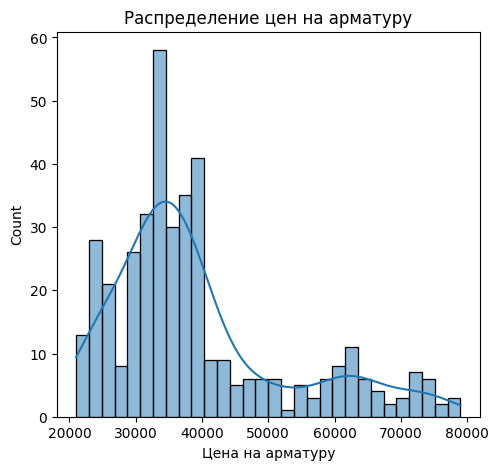

In [14]:
plt.figure(figsize=(12, 5))

# –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞
plt.subplot(1, 2, 1)
sns.histplot(df_ts["–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É"], bins=30, kde=True)
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–Ω –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É")


–ù–∞ –≥—Ä–∞—Ñ–∏–∫–∏ –≤–∏–¥–µ–º —á—Ç–æ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∑–Ω–∞—á–µ–Ω–∏–π  –ø—Ä–∏–º–µ—Ä–Ω–æ —Å–æ—Å—Ä–µ–¥–æ—Ç–æ—á–µ–Ω–æ –º–µ–∂–¥—É 30—Ç—ã—Å –∏ 40—Ç—ã—Å

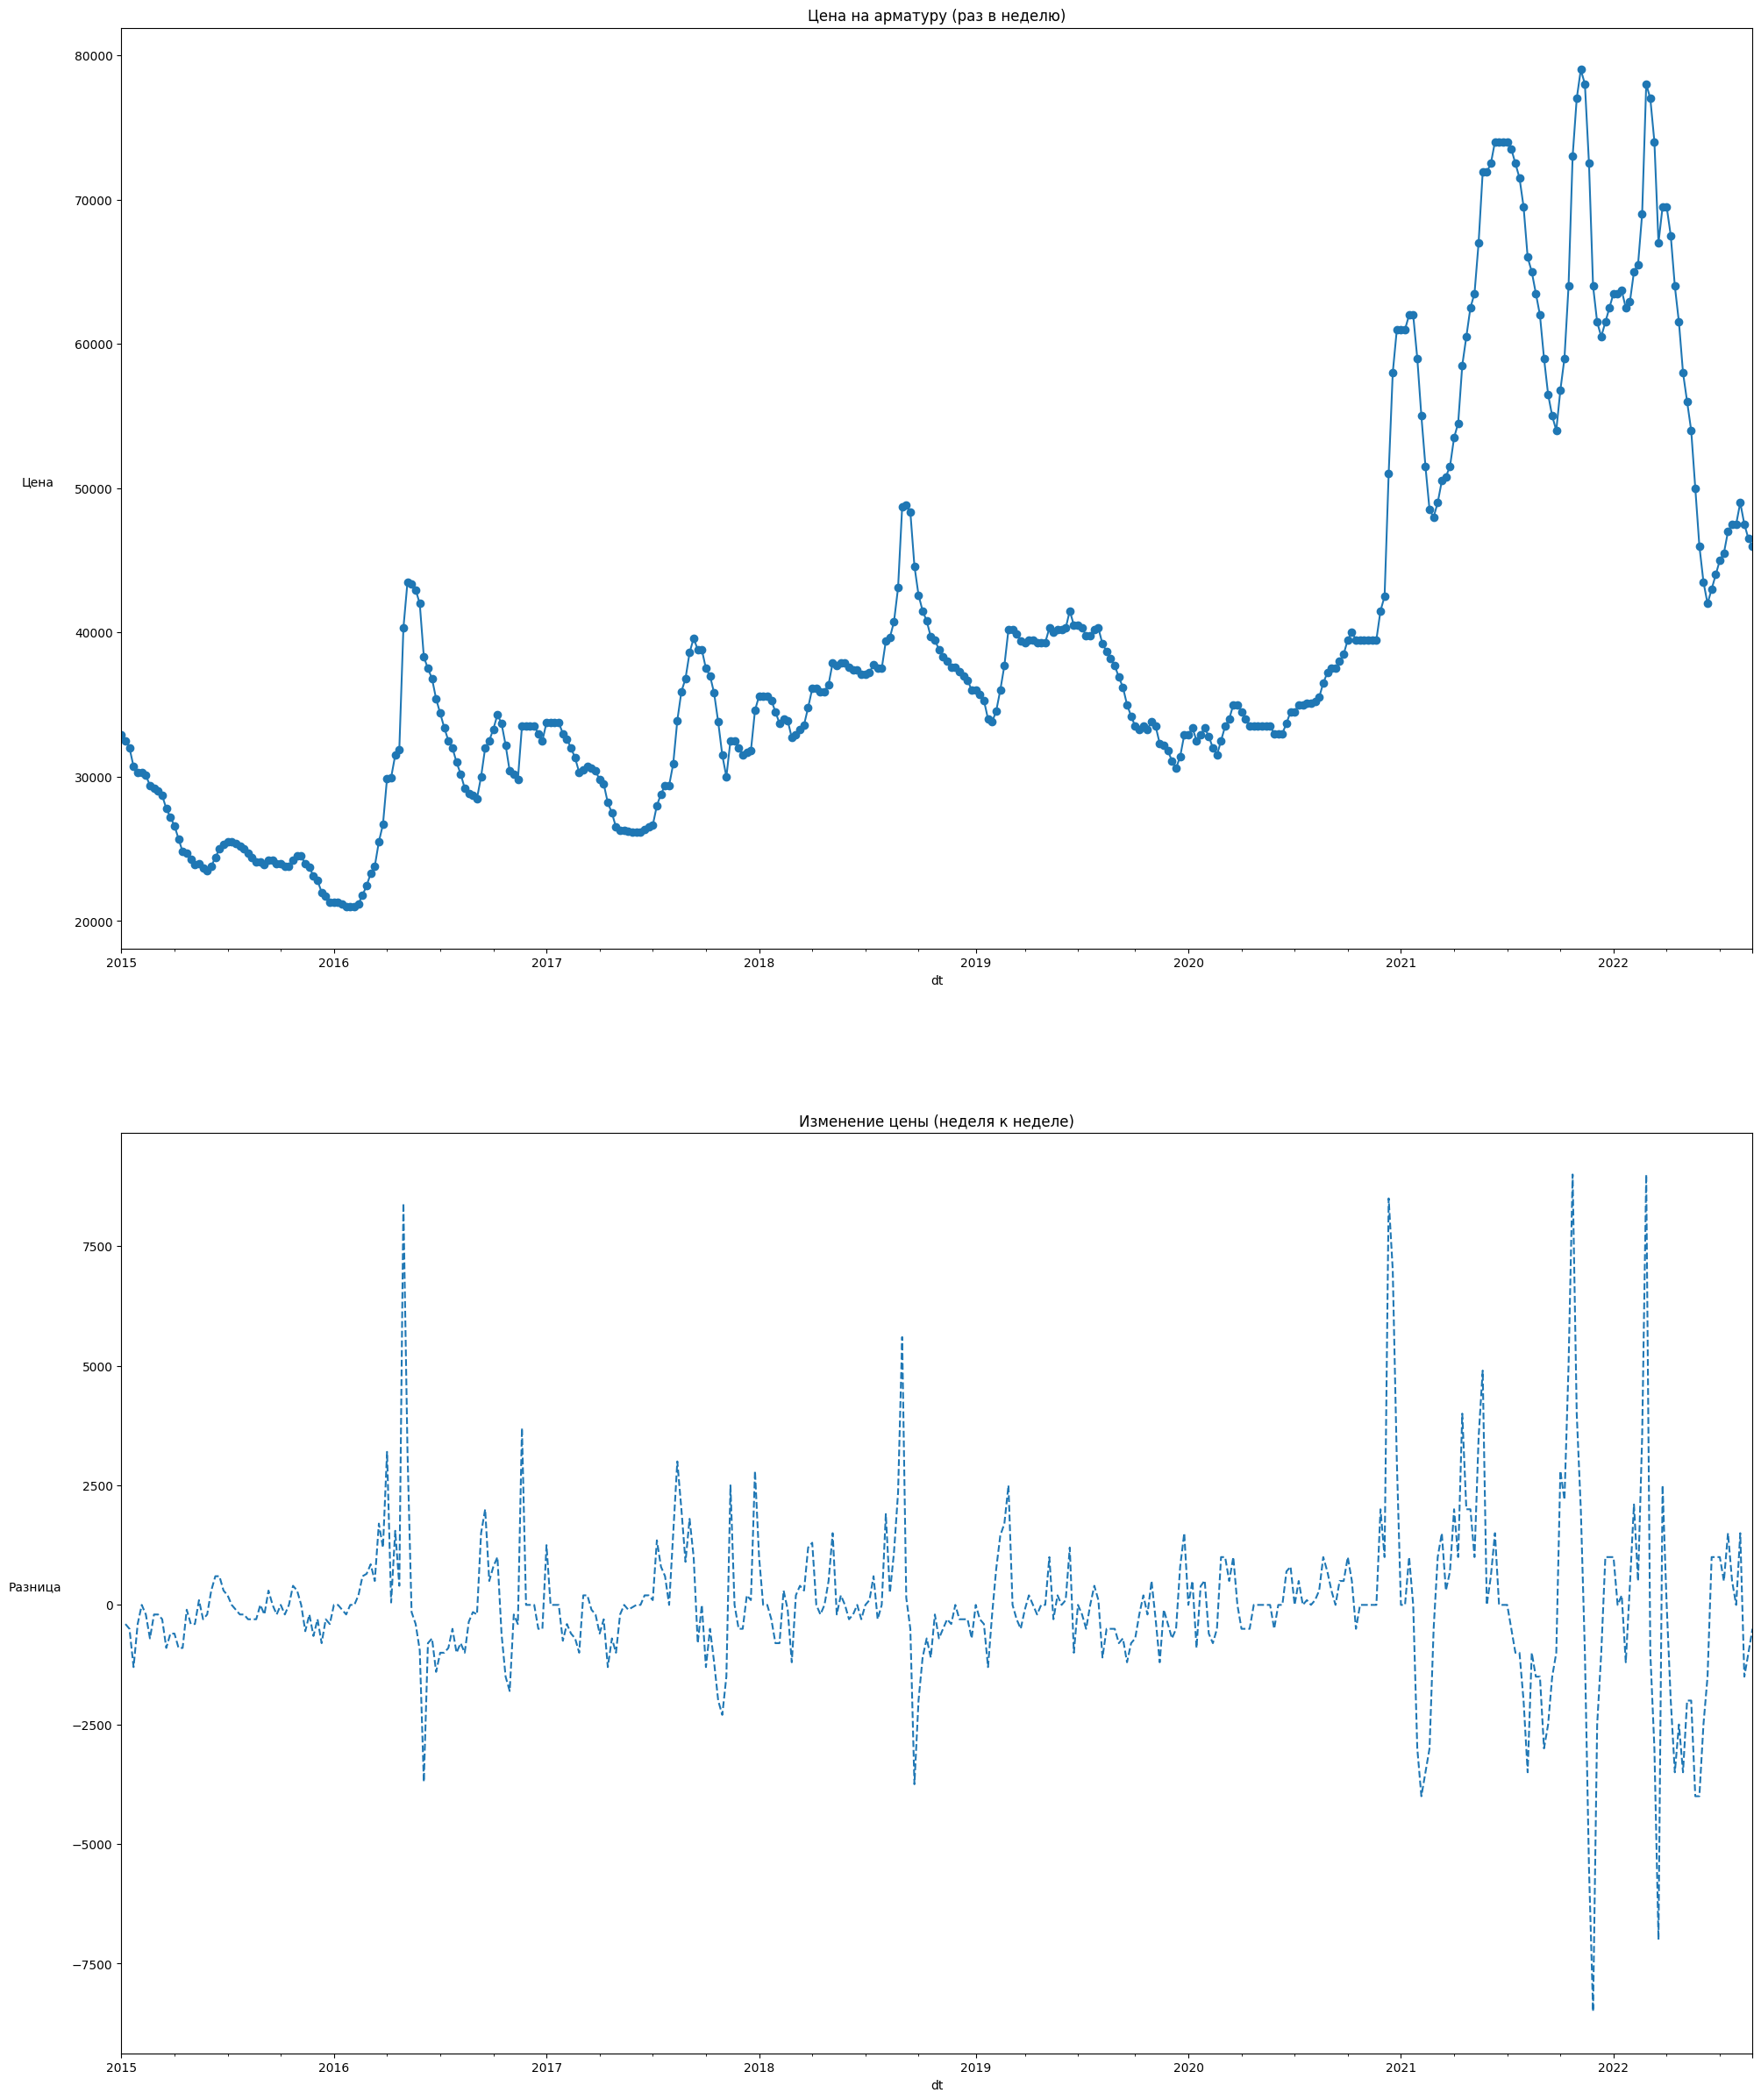

In [15]:
df_ts['–¶–µ–Ω–∞_—Ä–∞–∑–Ω–∏—Ü–∞_–Ω–µ–¥–µ–ª—è'] = df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É'].diff(1)  # –†–∞–∑–Ω–∏—Ü–∞ —Å –ø—Ä–æ—à–ª–æ–π –Ω–µ–¥–µ–ª–µ–π

plt.figure(figsize=(24, 30))

ax1 = plt.subplot(211)
ax1.set_title('–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Ä–∞–∑ –≤ –Ω–µ–¥–µ–ª—é)')
ax1.set_ylabel('–¶–µ–Ω–∞', rotation=0, labelpad=30)
df_ts.set_index('dt')['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É'].plot(ax=ax1, marker='o')

ax2 = plt.subplot(212)
ax2.set_title('–ò–∑–º–µ–Ω–µ–Ω–∏–µ —Ü–µ–Ω—ã (–Ω–µ–¥–µ–ª—è –∫ –Ω–µ–¥–µ–ª–µ)')
ax2.set_ylabel('–†–∞–∑–Ω–∏—Ü–∞', rotation=0, labelpad=30)
df_ts.set_index('dt')['–¶–µ–Ω–∞_—Ä–∞–∑–Ω–∏—Ü–∞_–Ω–µ–¥–µ–ª—è'].plot(ax=ax2, marker='', linestyle='dashed')

plt.show()


1. –í–µ—Ä—Ö–Ω–∏–π –≥—Ä–∞—Ñ–∏–∫ ‚Äì –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ —Ü–µ–Ω –Ω–∞ –∞—Ä–µ–Ω–¥—É.

–í–∏–¥–Ω–æ –Ω–∞–ª–∏—á–∏–µ —Ç—Ä–µ–Ω–¥–∞: –¥–æ–ª–≥–æ—Å—Ä–æ—á–Ω—ã–π —Ä–æ—Å—Ç —Ü–µ–Ω —Å –∫–æ–ª–µ–±–∞–Ω–∏—è–º–∏.

–ù–∞–±–ª—é–¥–∞—é—Ç—Å—è –≤—Å–ø–ª–µ—Å–∫–∏ –∏ –ø–∞–¥–µ–Ω–∏—è, –≤–æ–∑–º–æ–∂–Ω–æ, —Å–µ–∑–æ–Ω–Ω—ã–µ –∏–ª–∏ –≤—ã–∑–≤–∞–Ω–Ω—ã–µ –≤–Ω–µ—à–Ω–∏–º–∏ —Ñ–∞–∫—Ç–æ—Ä–∞–º–∏.

–í –ø–æ—Å–ª–µ–¥–Ω–∏–µ –≥–æ–¥—ã —Ü–µ–Ω—ã –¥–æ—Å—Ç–∏–≥–ª–∏ –ø–∏–∫–æ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π, –∞ –∑–∞—Ç–µ–º –Ω–∞—á–∞–ª–∏ —Å–Ω–∏–∂–∞—Ç—å—Å—è.
___


2. –ù–∏–∂–Ω–∏–π –≥—Ä–∞—Ñ–∏–∫ ‚Äì –∏–∑–º–µ–Ω–µ–Ω–∏—è —Ü–µ–Ω (—Ä–∞–∑–Ω–æ—Å—Ç—å —Ü–µ–Ω –º–µ–∂–¥—É —Å–æ—Å–µ–¥–Ω–∏–º–∏ —Ç–æ—á–∫–∞–º–∏).

–ö–æ–ª–µ–±–∞–Ω–∏—è –≤–æ–∫—Ä—É–≥ –Ω—É–ª—è —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å –∏–∑–º–µ–Ω–µ–Ω–∏–π.

–ü—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç —Ä–µ–∑–∫–∏–µ –≤—Å–ø–ª–µ—Å–∫–∏, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ –ø–µ—Ä–∏–æ–¥–∞—Ö –≤—ã—Å–æ–∫–æ–π –≤–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç–∏.

–í–æ–∑–º–æ–∂–Ω–æ, –µ—Å—Ç—å –≤–ª–∏—è–Ω–∏–µ –Ω–æ–≤–æ—Å—Ç–µ–π, –∫—Ä–∏–∑–∏—Å–æ–≤ –∏–ª–∏ –¥—Ä—É–≥–∏—Ö –≤–Ω–µ—à–Ω–∏—Ö —Å–æ–±—ã—Ç–∏–π.



In [16]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dt                   400 non-null    datetime64[ns]
 1   –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É     400 non-null    int64         
 2   –¶–µ–Ω–∞_—Ä–∞–∑–Ω–∏—Ü–∞_–Ω–µ–¥–µ–ª—è  399 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 9.5 KB


In [17]:
df_ts.replace(np.nan, 0, inplace=True)

In [18]:
df_ts.head(10)

dt  –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É  –¶–µ–Ω–∞_—Ä–∞–∑–Ω–∏—Ü–∞_–Ω–µ–¥–µ–ª—è
0 2015-01-05             32900                  0.0
1 2015-01-12             32500               -400.0
2 2015-01-19             32000               -500.0
3 2015-01-26             30700              -1300.0
4 2015-02-02             30300               -400.0
5 2015-02-09             30300                  0.0
6 2015-02-16             30100               -200.0
7 2015-02-23             29400               -700.0
8 2015-03-02             29200               -200.0
9 2015-03-09             29000               -200.0

In [19]:
# –ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å diff —Ä—è–¥–∞
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è —Ç–µ—Å—Ç–∞ ADF
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")

    if result[1] < 0.05:
        print("–†—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value < 0.05)")
    else:
        print("–†—è–¥ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value >= 0.05)")
# –ü—Ä–æ–≤–µ—Ä–∏–º –Ω–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å –∏—Å—Ö–æ–¥–Ω—ã–π —Ä—è–¥
adf_test(df_ts['–¶–µ–Ω–∞_—Ä–∞–∑–Ω–∏—Ü–∞_–Ω–µ–¥–µ–ª—è'])

ADF Statistic: -7.711973437154185
p-value: 1.2568518586885597e-11
Critical Values: {'1%': -3.447360865754795, '5%': -2.8690374364690445, '10%': -2.5707639493486636}
–†—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value < 0.05)


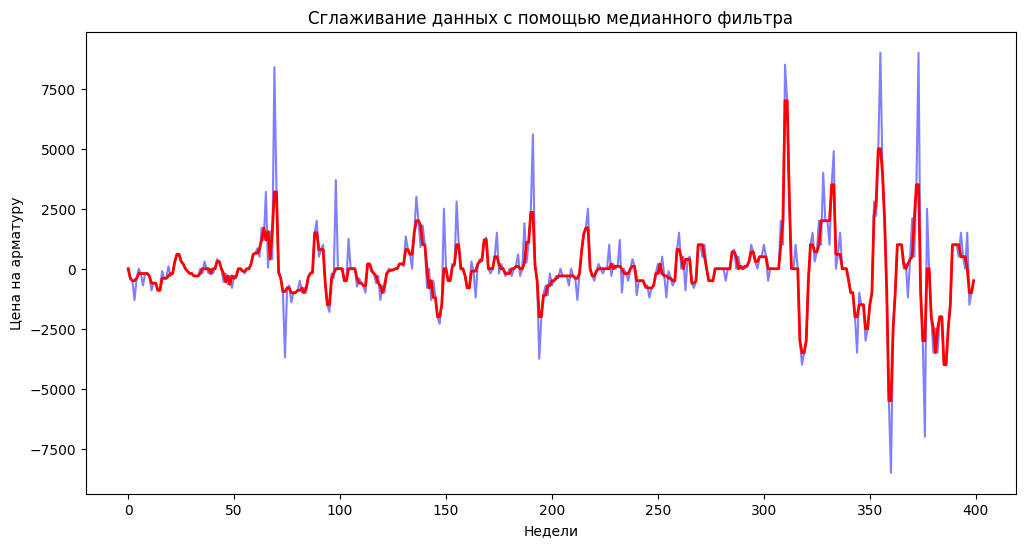

In [20]:
from scipy.signal import medfilt

# –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –º–µ–¥–∏–∞–Ω–Ω–æ–≥–æ —Ñ–∏–ª—å—Ç—Ä–∞
df_ts["–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)"] = medfilt(df_ts["–¶–µ–Ω–∞_—Ä–∞–∑–Ω–∏—Ü–∞_–Ω–µ–¥–µ–ª—è"], kernel_size=3)

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.figure(figsize=(12, 6))

# –ò—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
plt.plot(df_ts.index, df_ts["–¶–µ–Ω–∞_—Ä–∞–∑–Ω–∏—Ü–∞_–Ω–µ–¥–µ–ª—è"], label="–ò—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ", color='blue', alpha=0.5)

# –°–≥–ª–∞–∂–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
plt.plot(df_ts.index, df_ts["–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)"], label="–°–≥–ª–∞–∂–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ", color='red', linewidth=2)

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –≥—Ä–∞—Ñ–∏–∫–∞
plt.title("–°–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é –º–µ–¥–∏–∞–Ω–Ω–æ–≥–æ —Ñ–∏–ª—å—Ç—Ä–∞")
plt.xlabel("–ù–µ–¥–µ–ª–∏")
plt.ylabel("–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É")
plt.show()

In [21]:
# –ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å diff —Ä—è–¥–∞ –ø–æ—Å–ª–µ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è —Ç–µ—Å—Ç–∞ ADF
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")

    if result[1] < 0.05:
        print("–†—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value < 0.05)")
    else:
        print("–†—è–¥ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value >= 0.05)")
# –ü—Ä–æ–≤–µ—Ä–∏–º –Ω–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å –∏—Å—Ö–æ–¥–Ω—ã–π —Ä—è–¥
adf_test(df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)'])

ADF Statistic: -8.108679715553967
p-value: 1.2427490594539653e-12
Critical Values: {'1%': -3.447099431978147, '5%': -2.8689225261604263, '10%': -2.57070269105012}
–†—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value < 0.05)


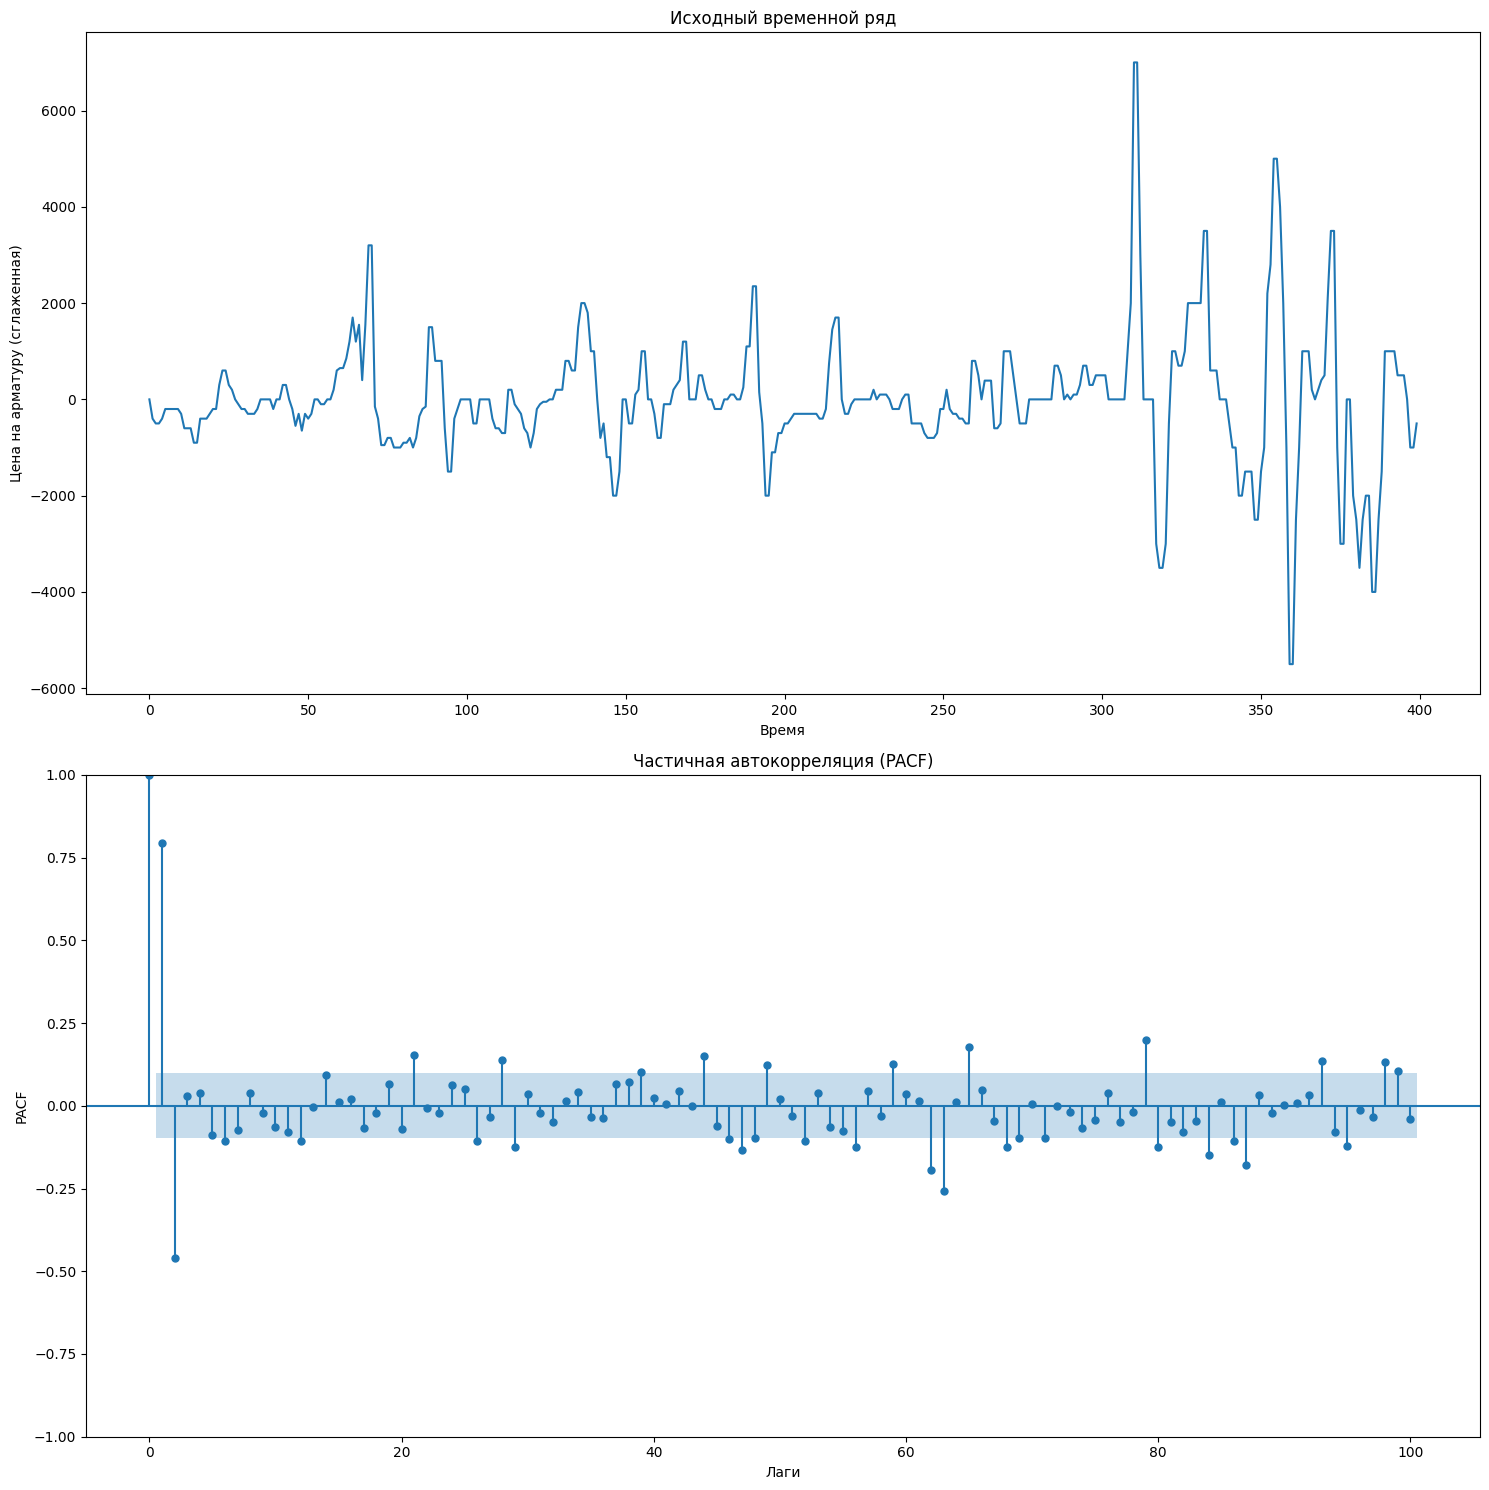

In [22]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# –°–æ–∑–¥–∞–µ–º –≥—Ä–∞—Ñ–∏–∫ —Å –¥–≤—É–º—è –ø–æ–¥–≥—Ä–∞—Ñ–∏–∫–∞–º–∏
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

# –ü–µ—Ä–≤—ã–π –ø–æ–¥–≥—Ä–∞—Ñ–∏–∫: –∏—Å—Ö–æ–¥–Ω—ã–π –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥
df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)'].plot(ax=ax[0])
ax[0].set_title('–ò—Å—Ö–æ–¥–Ω—ã–π –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥')
ax[0].set_xlabel('–í—Ä–µ–º—è')
ax[0].set_ylabel('–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)')

# –í—Ç–æ—Ä–æ–π –ø–æ–¥–≥—Ä–∞—Ñ–∏–∫: PACF (—á–∞—Å—Ç–∏—á–Ω–∞—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è)
plot_pacf(df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)'], lags=100, ax=ax[1], method='ols')
ax[1].set_title('–ß–∞—Å—Ç–∏—á–Ω–∞—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è (PACF)')
ax[1].set_xlabel('–õ–∞–≥–∏')
ax[1].set_ylabel('PACF')

# –û—Ç–æ–±—Ä–∞–∂–∞–µ–º –≥—Ä–∞—Ñ–∏–∫
plt.tight_layout()
plt.show()

1. –í–µ—Ä—Ö–Ω–∏–π –≥—Ä–∞—Ñ–∏–∫ (–∏—Å—Ö–æ–¥–Ω—ã–π –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥):

–•–æ—Ç—è –æ–Ω –≤—ã–≥–ª—è–¥–∏—Ç –≤–æ–ª–∞—Ç–∏–ª—å–Ω—ã–º, –ø–æ—Å–ª–µ –ø—Ä–æ–≤–µ—Ä–∫–∏ –Ω–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å –º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –Ω–µ —Å–æ–¥–µ—Ä–∂–∞—Ç —è–≤–Ω–æ–≥–æ —Ç—Ä–µ–Ω–¥–∞.

–≠—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ –ø—Ä–∏–º–µ–Ω—ë–Ω–Ω—ã–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è (–º–µ–¥–∏–∞–Ω–Ω–æ–µ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ –∏ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ) —Å–¥–µ–ª–∞–ª–∏ —Ä—è–¥ –ø—Ä–∏–≥–æ–¥–Ω—ã–º –¥–ª—è –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è.

–ö–æ–ª–µ–±–∞–Ω–∏—è –º–æ–≥—É—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å –∏–ª–∏ –∞–≤—Ç–æ—Ä–µ–≥—Ä–µ—Å—Å–∏—é.

___

2. –ù–∏–∂–Ω–∏–π –≥—Ä–∞—Ñ–∏–∫ (PACF):

–í—ã—Å–æ–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –Ω–∞ –ø–µ—Ä–≤–æ–º –ª–∞–≥–µ –≥–æ–≤–æ—Ä–∏—Ç –æ —Å–∏–ª—å–Ω–æ–π –∫—Ä–∞—Ç–∫–æ—Å—Ä–æ—á–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –≤ –¥–∞–Ω–Ω—ã—Ö.

–î–∞–ª—å–Ω–µ–π—à–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –∫–æ–ª–µ–±–ª—é—Ç—Å—è –≤–æ–∫—Ä—É–≥ 0, –Ω–æ –µ—Å—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –∑–Ω–∞—á–∏–º—ã—Ö –ø–∏–∫–æ–≤. –≠—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ –∞–≤—Ç–æ—Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω—ã–π –ø—Ä–æ—Ü–µ—Å—Å (AR), –≤–æ–∑–º–æ–∂–Ω–æ, –ø–æ—Ä—è–¥–∫–∞ 1 –∏–ª–∏ 2.

–£—á–∏—Ç—ã–≤–∞—è —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å, –º–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –º–æ–¥–µ–ª—å AR(p), –≥–¥–µ p ‚Äî —ç—Ç–æ –ø–æ—Ä—è–¥–æ–∫, –æ–ø—Ä–µ–¥–µ–ª—è–µ–º—ã–π –ø–æ PACF (–Ω–∞–ø—Ä–∏–º–µ—Ä, –µ—Å–ª–∏ –µ—Å—Ç—å –∑–Ω–∞—á–∏–º—ã–µ –ø–∏–∫–∏ –Ω–∞ 1 –∏ 2 –ª–∞–≥–∞—Ö, –º–æ–∂–Ω–æ –≤–∑—è—Ç—å AR(2)).


# –ú–æ–¥–µ–ª–∏

### –õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è

–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ (MAE): 1725.21
–ö–æ—Ä–µ–Ω—å —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π –æ—à–∏–±–∫–∏ (RMSE): 2206.64
–°–∏–º–º–µ—Ç—Ä–∏—á–Ω–∞—è MAPE (SMAPE): 165.57%
–°—Ä–µ–¥–Ω—è—è —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è (MDA): 0.33


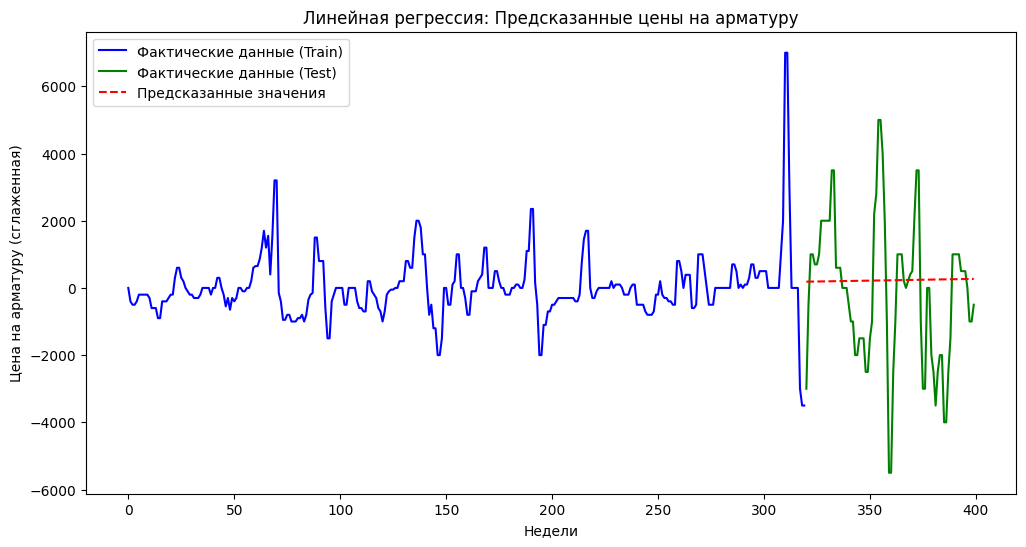

In [23]:
# 2. –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö
df_ts["weeks"] = (df_ts["dt"] - df_ts["dt"].min()).dt.days // 7  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –¥–∞—Ç—É –≤ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–µ–¥–µ–ª—å

# 3. –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (X) –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (y)
X = df_ts[["weeks"]]  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–µ–¥–µ–ª—å —Å –ø–µ—Ä–≤–æ–π –¥–∞—Ç—ã
y = df_ts["–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)"]  # –¶–µ–Ω—ã –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏
split_index = int(len(X) * 0.8)
X_train_lr, X_test_lr = X[:split_index], X[split_index:]
y_train_lr, y_test_lr = y[:split_index], y[split_index:]

# 5. –°–æ–∑–¥–∞–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
model = LinearRegression()
model.fit(X_train_lr, y_train_lr)

# 6. –ü–æ–ª—É—á–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
y_pred_lr = model.predict(X_test_lr)

# 7. –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏

# –°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ (MAE)
mae = mean_absolute_error(y_test_lr, y_pred_lr)

# –ö–æ—Ä–µ–Ω—å —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π –æ—à–∏–±–∫–∏ (RMSE)
rmse = np.sqrt(mean_squared_error(y_test_lr, y_pred_lr))

# –°–∏–º–º–µ—Ç—Ä–∏—á–Ω–∞—è MAPE (SMAPE)
smape = np.mean(2 * np.abs(y_test_lr - y_pred_lr) / (np.abs(y_test_lr) + np.abs(y_pred_lr))) * 100

# –°—Ä–µ–¥–Ω—è—è —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è (MDA) —Å –≤—ã—Ä–∞–≤–Ω–∏–≤–∞–Ω–∏–µ–º –∏–Ω–¥–µ–∫—Å–æ–≤
y_test = y_test_lr.diff().dropna()
y_pred = pd.Series(y_pred_lr, index=y_test_lr.index)

# –£–±–∏—Ä–∞–µ–º –Ω–µ—Å–æ–≤–ø–∞–¥–∞—é—â–∏–µ –∏–Ω–¥–µ–∫—Å—ã
common_index = y_test.index.intersection(y_pred.index)

mda = np.mean(np.sign(y_test.loc[common_index]) == np.sign(y_pred.loc[common_index]))

# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫
print(f"–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ (MAE): {mae:.2f}")
print(f"–ö–æ—Ä–µ–Ω—å —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π –æ—à–∏–±–∫–∏ (RMSE): {rmse:.2f}")
print(f"–°–∏–º–º–µ—Ç—Ä–∏—á–Ω–∞—è MAPE (SMAPE): {smape:.2f}%")
print(f"–°—Ä–µ–¥–Ω—è—è —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è (MDA): {mda:.2f}")


# 9. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
plt.figure(figsize=(12, 6))

# –õ–∏–Ω–∏—è —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö (Train)
plt.plot(X_train_lr, y_train_lr, color="blue", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (Train)")

# –õ–∏–Ω–∏—è —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö (Test)
plt.plot(X_test_lr, y_test_lr, color="green", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (Test)")

# –õ–∏–Ω–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (Test)
plt.plot(X_test_lr, y_pred_lr, color="red", linestyle="dashed", label="–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è")

plt.xlabel("–ù–µ–¥–µ–ª–∏")
plt.ylabel("–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)")
plt.title("–õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è: –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ —Ü–µ–Ω—ã –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É")
plt.legend()
plt.show()

### Arima

In [24]:
!pip install pmdarima


In [25]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [26]:
# –†–∞–∑–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–µ –∏ —Ç–µ—Å—Ç–æ–≤—ã–µ –≤—ã–±–æ—Ä–∫–∏ (80%/20%)
train_size_a = int(len(df_ts) * 0.8)
train_a, test_a = df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)'][:train_size_a], df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)'][train_size_a:]

# –ü—Ä–∏–º–µ–Ω–∏–º auto_arima –¥–ª—è –ø–æ–¥–±–æ—Ä–∞ –º–æ–¥–µ–ª–∏ ARIMA
model = auto_arima(train_a, seasonal=False, stepwise=True, trace=True)

# –í—ã–≤–æ–¥–∏–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏
print(f"–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã ARIMA: {model.order}")


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4960.120, Time=0.57 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5314.108, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5012.833, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5087.915, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=4962.189, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4965.332, Time=0.06 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=4959.610, Time=1.15 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=4967.031, Time=1.74 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=4961.644, Time=2.66 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=3.94 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=4960.097, Time=1.85 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=4960.760, Time=1.28 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=4.70 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=4961.691, Time=2.75 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]       

In [27]:

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è —Ç–µ—Å—Ç–∞ ADF
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")

    if result[1] < 0.05:
        print("–†—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value < 0.05)")
    else:
        print("–†—è–¥ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value >= 0.05)")
# –ü—Ä–æ–≤–µ—Ä–∏–º –Ω–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å –∏—Å—Ö–æ–¥–Ω—ã–π —Ä—è–¥
adf_test(df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)'])

ADF Statistic: -8.108679715553967
p-value: 1.2427490594539653e-12
Critical Values: {'1%': -3.447099431978147, '5%': -2.8689225261604263, '10%': -2.57070269105012}
–†—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value < 0.05)


In [29]:
# –í—ã–±–∏—Ä–∞–µ–º —Å—Ç–æ–ª–±–µ—Ü —Å –¥–∞–Ω–Ω—ã–º–∏ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞
time_series_a = df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)']
model = ARIMA(time_series_a, order= model.order )
fitted_model = model.fit()


MAE: 769.0646
RMSE: 1098.8027
SMAPE: 75.17%
MDA:¬†81.01%


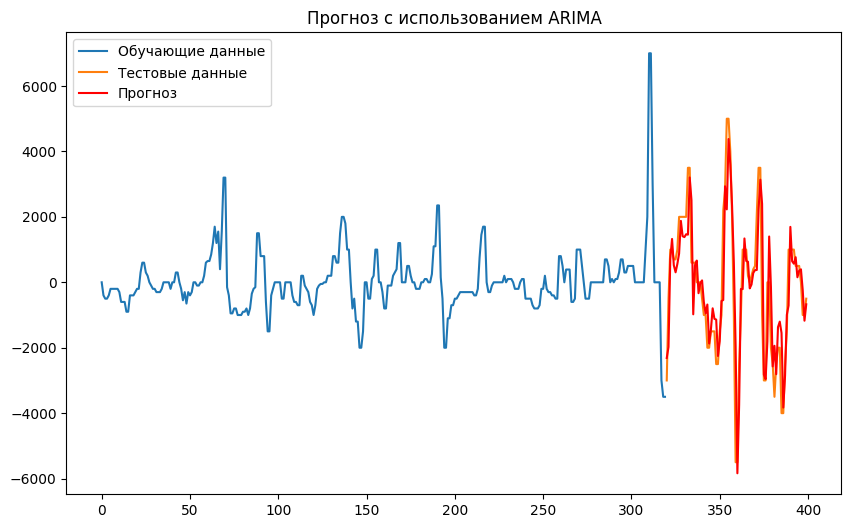

In [30]:
# –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
forecast = fitted_model.predict(start=len(train_a), end=len(train_a) + len(test_a) - 1)

# –°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ (MAE)
mae = mean_absolute_error(test_a, forecast)
print(f"MAE: {mae:.4f}")

#  –ö–æ—Ä–µ–Ω—å —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π –æ—à–∏–±–∫–∏ (RMSE)
rmse = np.sqrt(mean_squared_error(test_a, forecast))
print(f"RMSE: {rmse:.4f}")

# –°–∏–º–º–µ—Ç—Ä–∏—á–Ω–∞—è MAPE (SMAPE)
smape = np.mean(2 * np.abs(forecast - test_a) / (np.abs(test_a) + np.abs(forecast))) * 100
print(f"SMAPE: {smape:.2f}%")

# –°–¥–≤–∏–≥–∞–µ–º –º–∞—Å—Å–∏–≤—ã –Ω–∞ –æ–¥–∏–Ω —ç–ª–µ–º–µ–Ω—Ç
test_a_shifted = test_a[:-1]
forecast_shifted = forecast[:-1]

# –í—ã—á–∏—Å–ª—è–µ–º MDA
mda = np.mean(np.sign(test_a_shifted) == np.sign(forecast_shifted))
print(f"MDA:¬†{mda:.2%}")



# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
plt.figure(figsize=(10, 6))
plt.plot(train_a, label='–û–±—É—á–∞—é—â–∏–µ –¥–∞–Ω–Ω—ã–µ')
plt.plot(test_a, label='–¢–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ')
plt.plot(forecast, label='–ü—Ä–æ–≥–Ω–æ–∑', color='red')
plt.legend()
plt.title('–ü—Ä–æ–≥–Ω–æ–∑ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º ARIMA')
plt.show()

### SARIMA

                                      SARIMAX Results                                       
Dep. Variable:        –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)   No. Observations:                  320
Model:             SARIMAX(4, 0, 3)x(2, 1, [1], 20)   Log Likelihood               -2355.789
Date:                              Fri, 21 Mar 2025   AIC                           4733.577
Time:                                      08:19:10   BIC                           4774.319
Sample:                                           0   HQIC                          4749.882
                                              - 320                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.1945      0.400      5.491      0.000       1.411       2

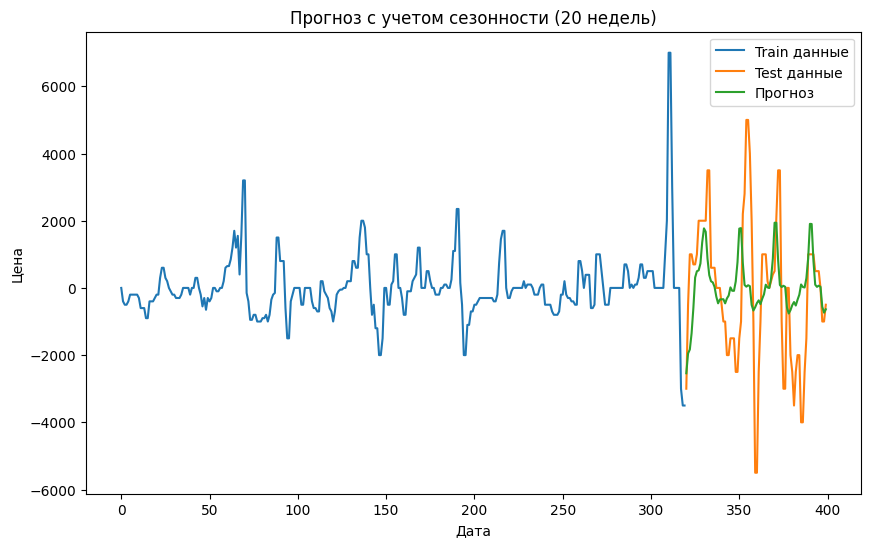

In [45]:
# –°–æ–∑–¥–∞–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ SARIMA —Å –∑–∞–¥–∞–Ω–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
model = SARIMAX(
    train_a,
    order=(4, 0, 3),              # –ù–µ—Å–µ–∑–æ–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (p, d, q)
    seasonal_order=(2, 1, 1, 20)  # –°–µ–∑–æ–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (P, D, Q, m)
)
results = model.fit()

# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –æ–±—É—á–µ–Ω–∏—è
print(results.summary())

# –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–∞ test –¥–∞–Ω–Ω—ã–µ
forecast = results.get_forecast(steps=len(test_a)).predicted_mean

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
plt.figure(figsize=(10, 6))
plt.plot(train_a.index, train_a, label='Train –¥–∞–Ω–Ω—ã–µ')  # –û–±—É—á–∞—é—â–∏–µ –¥–∞–Ω–Ω—ã–µ
plt.plot(test_a.index, test_a, label='Test –¥–∞–Ω–Ω—ã–µ')    # –§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è test –¥–∞–Ω–Ω—ã—Ö
plt.plot(test_a.index, forecast, label='–ü—Ä–æ–≥–Ω–æ–∑')    # –ü—Ä–æ–≥–Ω–æ–∑ –º–æ–¥–µ–ª–∏
plt.title('–ü—Ä–æ–≥–Ω–æ–∑ —Å —É—á–µ—Ç–æ–º —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏ (20 –Ω–µ–¥–µ–ª—å)')
plt.xlabel('–î–∞—Ç–∞')
plt.ylabel('–¶–µ–Ω–∞')
plt.legend()
plt.show()

### LSTM

In [31]:
# –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö
scaler = MinMaxScaler(feature_range=(0, 1))
df_ts["–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)"] = scaler.fit_transform(df_ts[["–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)"]])

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ train/test
train_size_lstm = int(len(df_ts) * 0.8)
train_lstm, test_lstm = df_ts.iloc[:train_size_lstm], df_ts.iloc[train_size_lstm:]

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –æ–∫–æ–Ω –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length].values)
        y.append(data.iloc[i+seq_length].values)
    return np.array(X), np.array(y)

seq_length = 30  # –î–ª–∏–Ω–∞ –æ–∫–Ω–∞

# –°–æ–∑–¥–∞–µ–º –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ *—Ç–æ–ª—å–∫–æ –∏–∑ test_lstm*
X_train, y_train = create_sequences(train_lstm[["–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)"]], seq_length)
X_test, y_test = create_sequences(test_lstm[["–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)"]], seq_length)

In [32]:
# –ò–∑–º–µ–Ω—è–µ–º —Ñ–æ—Ä–º—É –¥–∞–Ω–Ω—ã—Ö –¥–ª—è LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [33]:
# –°–æ–∑–¥–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# –ö–æ–º–ø–∏–ª—è—Ü–∏—è –º–æ–¥–µ–ª–∏
model.compile(optimizer="adam", loss="mse")

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16, verbose=1)


Epoch 1/50
19/19 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 45ms/step - loss: 0.0385 - val_loss: 0.0376
Epoch 2/50
19/19 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 17ms/step - loss: 0.0103 - val_loss: 0.0375
Epoch 3/50
19/19 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 19ms/step - loss: 0.0083 - val_loss: 0.0367
Epoch 4/50
19/19 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 18ms/step - loss: 0.0107 - val_loss: 0.0374
Epoch 5/50
19/19 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 17ms/step - loss: 0.0088 - val_loss: 0.0357
Epoch 6/50
19/19 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 20ms/step - loss: 0.0069 - val_loss: 0.0357
Epoch 7/50
19/19 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 20ms/step - loss: 0.0065 - val_loss: 0.0351
Epoch 8/50
19/19 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 18ms/step - loss: 0.0075 - val_loss: 0.0352


In [40]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–¥–±–æ—Ä–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
def build_model(hp):
    model = Sequential()

    # –ü–µ—Ä–≤—ã–π —Å–ª–æ–π LSTM
    model.add(LSTM(
        units=hp.Int('units_1', min_value=32, max_value=128, step=16),
        return_sequences=True,
        input_shape=(seq_length, 1),
        kernel_regularizer=tf.keras.regularizers.l2(0.01)
    ))
    model.add(Dropout(hp.Float('dropout_1', 0.1, 0.5, step=0.1)))
    model.add(BatchNormalization())

    # –í—Ç–æ—Ä–æ–π —Å–ª–æ–π LSTM
    model.add(LSTM(
        units=hp.Int('units_2', min_value=32, max_value=128, step=16),
        return_sequences=False
    ))
    model.add(Dropout(hp.Float('dropout_2', 0.1, 0.5, step=0.1)))

    # –ü–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã–µ —Å–ª–æ–∏
    model.add(Dense(hp.Int('dense_units', 10, 50, step=10), activation="relu"))
    model.add(Dense(1))

    # –ö–æ–º–ø–∏–ª—è—Ü–∏—è –º–æ–¥–µ–ª–∏
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss="mse"
    )

    return model

# –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ Keras Tuner –¥–ª—è –ø–æ–¥–±–æ—Ä–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
tuner = kt.Hyperband(
    build_model,
    objective="val_loss",
    max_epochs=20,
    factor=3,
    directory="tuner_dir",
    project_name="lstm_tuning"
)

# –ö–æ–ª–ª–±—ç–∫–∏ –¥–ª—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∏ –ø—Ä–∏ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–∏
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=1e-6)

# –ü–æ–∏—Å–∫ –ª—É—á—à–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
tuner.search(X_train, y_train, validation_data=(X_test, y_test),
             epochs=20, batch_size=16, callbacks=[early_stopping, reduce_lr], verbose=1)

# –í—ã–±–æ—Ä –Ω–∞–∏–ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å –ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
history = best_model.fit(X_train, y_train, validation_data=(X_test, y_test),
                         epochs=20, batch_size=16, callbacks=[early_stopping, reduce_lr], verbose=1)

Trial 90 Complete [00h 00m 17s]
val_loss: 0.12999720871448517

Best val_loss So Far: 0.018687164410948753
Total elapsed time: 00h 21m 56s
Epoch 1/20
19/19 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 50ms/step - loss: 0.1067 - val_loss: 0.1379 - learning_rate: 0.0010
Epoch 2/20
19/19 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 22ms/step - loss: 0.0407 - val_loss: 0.1206 - learning_rate: 0.0010
Epoch 3/20
19/19 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 22ms/step - loss: 0.0239 - val_loss: 0.1114 - learning_rate: 0.0010
Epoch 4/20
19/19 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 22ms/step - loss: 0.0186 - val_loss: 0.0973 - learning_rate: 0.0010
Epoch 5/20
19/19 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 22ms/step - loss: 0.0179 - val_loss: 0.0924 - learning_rate: 0.0010
Epoch 6/20
19/19 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 26ms/step - loss: 0.0146 - val_loss:

In [43]:
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–∏
y_pred = best_model.predict(X_test)

# –û–±—Ä–∞—Ç–Ω–æ–µ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º y_test –≤ Series —Å –∏–Ω–¥–µ–∫—Å–∞–º–∏
y_test_series = pd.Series(y_test_inv.flatten())

# 1. –°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ (MAE)
mae = mean_absolute_error(y_test_inv, y_pred_inv)

# 2. –ö–æ—Ä–µ–Ω—å —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π –æ—à–∏–±–∫–∏ (RMSE)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

# 3. –°–∏–º–º–µ—Ç—Ä–∏—á–Ω–∞—è MAPE (SMAPE)
smape = np.mean(2 * np.abs(y_test_inv - y_pred_inv) / (np.abs(y_test_inv) + np.abs(y_pred_inv))) * 100

# –ü—Ä–æ–≤–µ—Ä—è–µ–º, —Å–æ–≤–ø–∞–¥–∞—é—Ç –ª–∏ —Ä–∞–∑–º–µ—Ä—ã –º–∞—Å—Å–∏–≤–æ–≤
if len(y_pred_inv.flatten()) != len(y_test_series):
    raise ValueError(f"–†–∞–∑–º–µ—Ä—ã y_pred_inv ({len(y_pred_inv.flatten())}) –∏ y_test ({len(y_test_series)}) –Ω–µ —Å–æ–≤–ø–∞–¥–∞—é—Ç!")

# –ï—Å–ª–∏ —Ä–∞–∑–º–µ—Ä—ã —Å–æ–≤–ø–∞–¥–∞—é—Ç, —Å–æ–∑–¥–∞–µ–º pd.Series —Å –∏–Ω–¥–µ–∫—Å–∞–º–∏ y_test_series
y_pred = pd.Series(y_pred_inv.flatten(), index=y_test_series.index)

common_index = y_test_series.index.intersection(y_pred.index)

# 4. –°—Ä–µ–¥–Ω—è—è —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è (MDA)
mda = np.mean(np.sign(y_test_series) == np.sign(y_pred))

# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫
print(f"–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ (MAE): {mae:.2f}")
print(f"–ö–æ—Ä–µ–Ω—å —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π –æ—à–∏–±–∫–∏ (RMSE): {rmse:.2f}")
print(f"–°–∏–º–º–µ—Ç—Ä–∏—á–Ω–∞—è MAPE (SMAPE): {smape:.2f}%")
print(f"–°—Ä–µ–¥–Ω—è—è —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è (MDA): {mda:.2f}")


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 329ms/step
–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ (MAE): 1749.04
–ö–æ—Ä–µ–Ω—å —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π –æ—à–∏–±–∫–∏ (RMSE): 2290.65
–°–∏–º–º–µ—Ç—Ä–∏—á–Ω–∞—è MAPE (SMAPE): 118.72%
–°—Ä–µ–¥–Ω—è—è —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è (MDA): 0.55


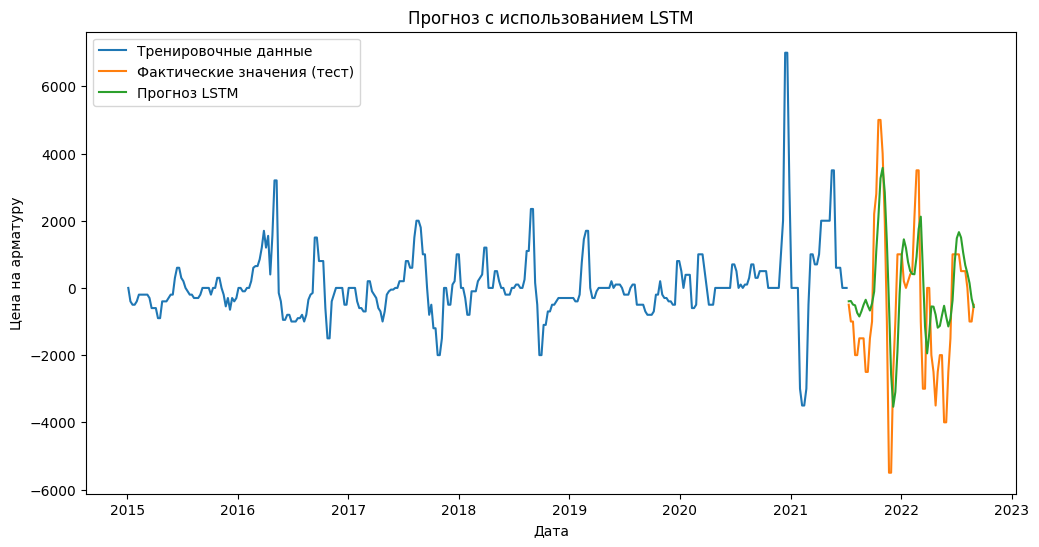

In [42]:
# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
train_dates = df_ts['dt'][:train_size_lstm + seq_length]
test_dates = df_ts['dt'].iloc[train_size_lstm + seq_length: train_size_lstm + seq_length + len(y_test)]

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(12, 6))
plt.plot(df_ts['dt'][:train_size_lstm + seq_length], scaler.inverse_transform(df_ts[["–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)"]])[:train_size_lstm + seq_length], label="–¢—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ")
plt.plot(test_dates, y_test_inv, label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è (—Ç–µ—Å—Ç)")
plt.plot(test_dates, y_pred_inv, label="–ü—Ä–æ–≥–Ω–æ–∑ LSTM")
plt.xlabel("–î–∞—Ç–∞")
plt.ylabel("–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É")
plt.title("–ü—Ä–æ–≥–Ω–æ–∑ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º LSTM")
plt.legend()
plt.show()

### —Å–º–µ—Å—å 2 –º–æ–¥–µ–ª–π

## –õ—É—á—à–∞—è –º–æ–¥–µ–ª—å